In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF,LatentDirichletAllocation
%matplotlib inline

In [4]:
with open('../data/clean_tweets.pkl', 'rb') as infile:
    df = pickle.load(infile)

In [3]:
df.shape

(809416, 19)

In [4]:
df.head()

,_id,coordinates,coordinates_type,country,created_at,default_profile_image,hash_tags,lang,text,tweet_location,user_created,user_followers,user_following,user_likes,user_location,user_num_tweets,user_screen_name,sentiment,sentiment_type
0,5a5abc8f4dd9627aad3c1326,None,None,United States,Sun Jan 07 18:21:57 +0000 2018,False,[],en,Because they’ll clap at a opp or someone who d...,"Los Angeles, CA",Fri Aug 06 17:54:32 +0000 2010,1410,219,2253,Outer Space ↔️City of Angels,36230,ForeverKofi,-0.8720,neg
1,5a5abc8f4dd9627aad3c1327,"[26.6167555, -80.0684479]",Point,United States,Sun Jan 07 18:21:57 +0000 2018,False,"[{'text': 'job', 'indices': [34, 38]}]",en,Can you recommend anyone for this ? Daily Subs...,"Lake Worth, FL",Sat Aug 21 04:43:48 +0000 2010,392,225,0,Florida,161,tmj_FL_EDU,0.3612,neu
2,5a5abc8f4dd9627aad3c1328,None,None,United States,Sun Jan 07 18:21:57 +0000 2018,False,[],en,Memes to cope and I’m off work tomorrow,"Waco, TX",Mon Oct 27 02:05:39 +0000 2008,565,359,10048,"Waco, Texas",28053,dirtybohemia,0.0000,neu
3,5a5abc8f4dd9627aad3c1329,None,None,United States,Sun Jan 07 18:21:57 +0000 2018,False,[],en,I cannot wait for August,"Muncie, IN",Sat Jun 23 21:37:47 +0000 2012,533,850,9986,trapped inside my head,5539,ejanepuckett,0.0000,neu
4,5a5abc8f4dd9627aad3c132a,None,None,United States,Sun Jan 07 18:21:57 +0000 2018,False,[],en,is water wet?!,"Sheffield Lake, OH",Mon Nov 04 20:39:21 +0000 2013,201,237,9986,None,1467,emdavis1522,0.0000,neu


In [5]:
gb = df.groupby('sentiment_type')

In [11]:
num_of_pos = gb.get_group('pos').shape[0]

In [12]:
num_of_neu = gb.get_group('neu').shape[0]

In [13]:
num_of_neg = gb.get_group('neg').shape[0]

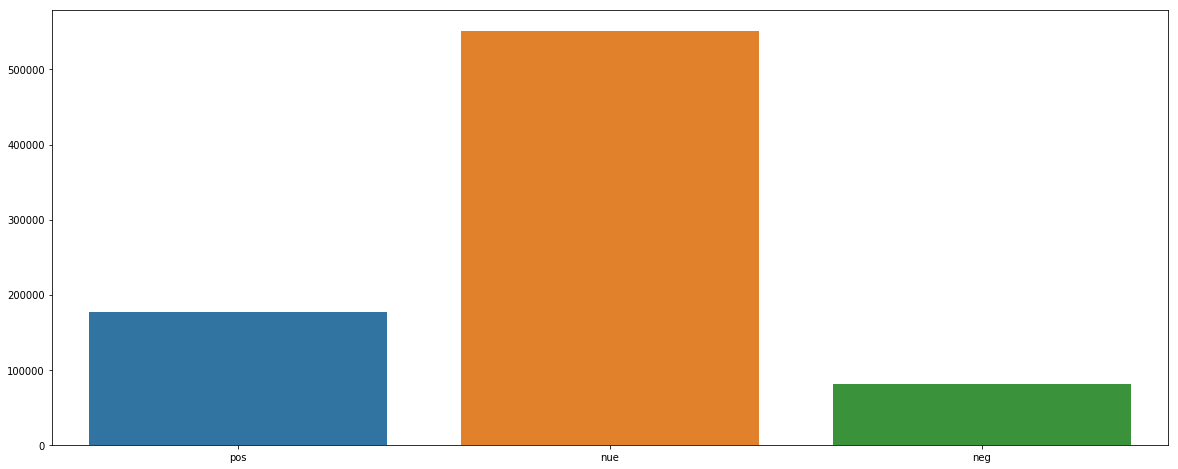

In [20]:
fig = plt.figure(figsize=(20, 8))
sns.barplot(['pos', 'nue', 'neg'], [num_of_pos, num_of_neu, num_of_neg])

In [30]:
# fig = plt.figure(figsize=(14, 6))
# ax1 = fig.add_subplot(311)
# ax1.set_title('Positive')
# ax2 = fig.add_subplot(312)
# ax2.set_title('Neutral')
# ax3 = fig.add_subplot(313)
# ax3.set_title('Negative')

# sns.violinplot(gb.get_group('pos').sentiment, ax=ax1)
# sns.violinplot(gb.get_group('neu').sentiment, ax=ax2)
# sns.violinplot(gb.get_group('neg').sentiment, ax=ax3)
# plt.xlabel('Sentiment')
# plt.ylabel('')

Text(0.5,1,'Positive')

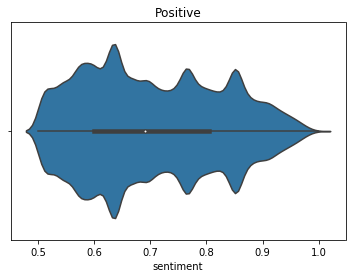

In [31]:
sns.violinplot(gb.get_group('pos').sentiment)
plt.title('Positive')

Text(0.5,1,'Neutral')

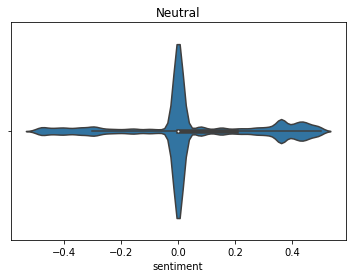

In [32]:
sns.violinplot(gb.get_group('neu').sentiment)
plt.title('Neutral')

Text(0.5,1,'Negative')

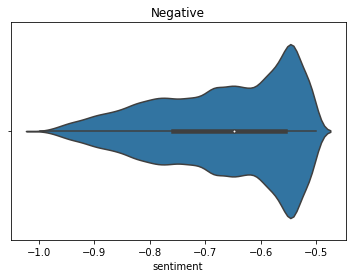

In [33]:
sns.violinplot(gb.get_group('neg').sentiment)
plt.title('Negative')

In [41]:
type(df[df.sentiment_type == 'pos'])

pandas.core.frame.DataFrame

In [7]:
df[df.sentiment_type == 'pos'].sort_values('sentiment', ascending=False)[['text', 'sentiment']][:10]

,text,sentiment
799834,"YES, YES, YES, YES, YES, YES, YES, YES, YES,...",0.9989
721411,"yeah, yeaH, yeAH, yEAH, YEAH, YEAH, YEAH, YEAH...",0.9985
717570,YEP! YEP! YEP! YEP! YEP! YEP! YEP! YEP! YEP! ...,0.9984
688902,I love my dog. I love my dog. I love my dog. I...,0.9968
757100,stay positive stay positive stay positive stay...,0.9966
721881,II lI loI lovI loveI love II love itI love it ...,0.9965
728505,II lI loI lovI loveI love OI love Ol I love Ol...,0.9965
729735,II lI loI lovI loveI love OI love Ol I love ol...,0.9965
736986,I love I love I love I love I love I love...,0.9963
730879,II lI loI lovI loveI love OI love Ol I love ol...,0.9960


In [6]:
df[df.sentiment_type == 'neg'].sort_values('sentiment')[['text', 'sentiment']][10:20]

,text,sentiment
285657,"Bro fuck work, fuck money, fuck guinea pigs, f...",-0.9902
453995,Nigga she said dedication how she hating shit...,-0.9897
431243,FUCK THAT IRON BOWL.. FUCK AUBURN.. FUCK STIDH...,-0.9894
371724,"To hell to hell to hell with Ga, to hell to he...",-0.9884
42866,"i hate a goofy grimy ass always in sum drama, ...",-0.9881
43556,"i hate a goofy grimy ass always in sum drama, ...",-0.9881
671526,I hate this generation. I hate how everyone’s ...,-0.9879
255271,The NUMBER ONE DESTROYING AMERICA is LIAR IN ...,-0.9875
447652,I can never say this enough but yet I’m tired ...,-0.9867
496702,fuck FUCK YOU WE STAND AND ISREAL. FUCK UN. ...,-0.9867


In [5]:
df.iloc[597633].text

'FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK '

In [1]:
%run nmf.py


Topics in NMF model:
Topic 1:
interested great texas north maybe folk flight florida focus yummy finish follow follower food football
Topic 2:
love fall know people miss tell watch girl song dude thing fucking baby guy rain
Topic 3:
happy birthday hope bday tuesday miss girl year sunday enjoy today make homie friend wait
Topic 4:
good friend luck thing morning hope look feel world know life year night time news
Topic 5:
thank follow share appreciate miss hope support girl glad make today goodness night bless sweet
Topic 6:
great manager time store technician associate game assistant hope service today team idea shift driver
Topic 7:
pron friend help hope life support need family appreciate tweet time start people trust welcome
Topic 8:
lmao nigga true need friend try know blow wild swear hear tell people wanna night
Topic 9:
want late work opening click team join beauty read view apply ulta advisor care seasonal
Topic 10:
just game make know play time look think amazing beautiful year